In [5]:
%pwd

'c:\\shjung\\pythonExam\\240822'

In [5]:
import numpy as np

fruits = np.load('C:/shjung/pythonExam/ex/data/fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [6]:
fruits_2d.shape

(300, 10000)

In [7]:
from sklearn.cluster import KMeans


In [8]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

c:\anaconda3\envs\cv2\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [9]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [10]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))


In [13]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()


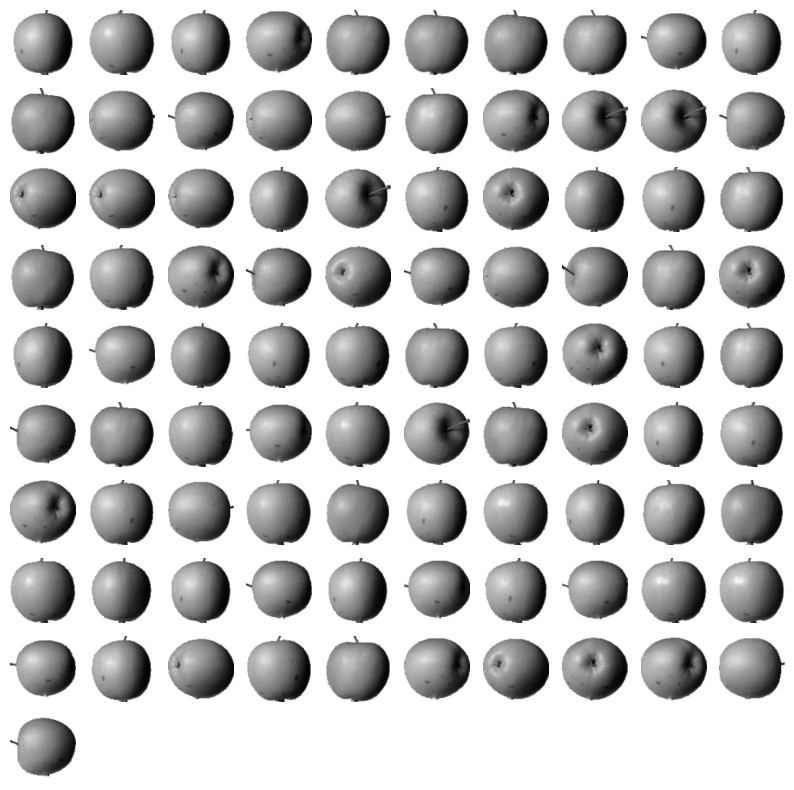

In [14]:
draw_fruits(fruits[km.labels_==0])

In [23]:
km.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.19607843, 1.1372549 , 1.19607843, ..., 1.        , 1.        ,
        1.        ],
       [1.02439024, 1.02439024, 1.02439024, ..., 1.        , 1.        ,
        1.        ]])

In [24]:
km.cluster_centers_.shape

(6, 10000)

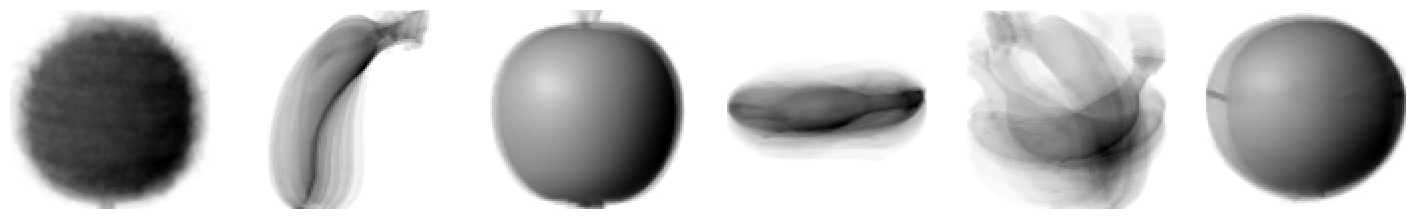

In [26]:
draw_fruits( km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [27]:
fruits_2d[100:101]

array([[1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환 해주는 transform() 메서드


In [29]:
km.transform(fruits_2d[100:101])

array([[3380.6970739 , 9919.4734438 , 5225.20223643, 9830.39495427,
        8604.96670087, 5910.99823422]])

In [30]:
# 추천도 할 수 있다.
km.predict(fruits_2d[100:101])

array([0])

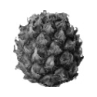

In [31]:
draw_fruits(fruits[100:101])

In [32]:
km.inertia_

4034428491.557118

In [33]:
km.n_iter_

9

In [ ]:
# 이너셔 (inertia) : 클러스터 중심과 클러스터에 속한 샘플 사이의 거리, 그 거리의 제곱합
# 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값이다.

# 엘보우(elbow) 방법 : 클러스터 개수를 늘려 가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾아야 한다.

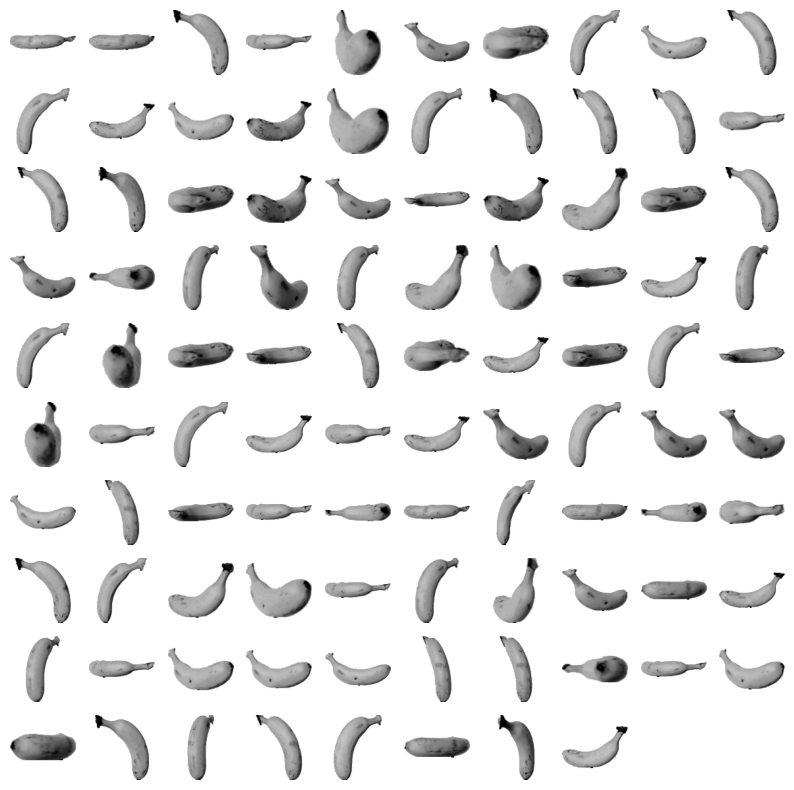

In [15]:
draw_fruits(fruits[km.labels_==1])

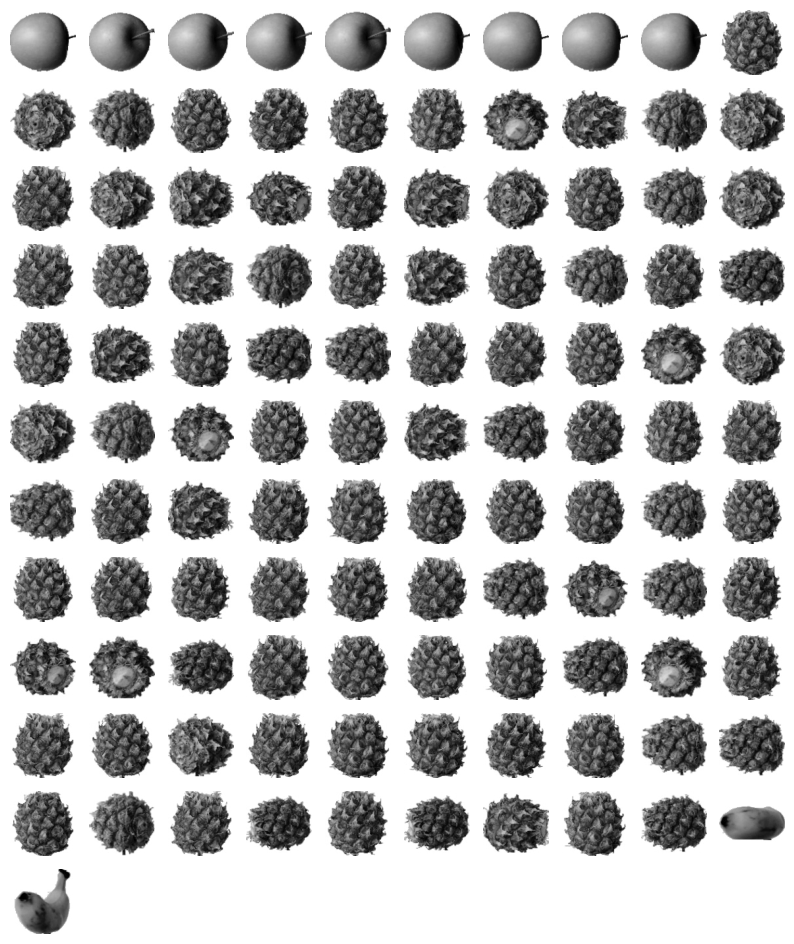

In [16]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

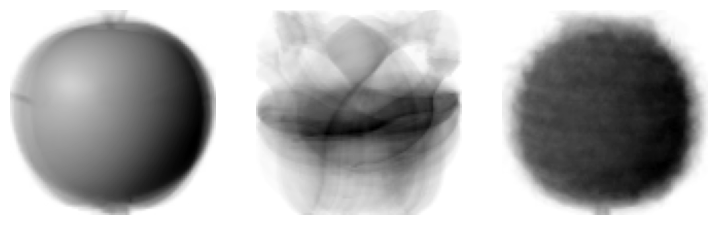

In [17]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [18]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [19]:
print(km.predict(fruits_2d[100:101]))

[2]


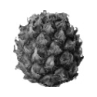

In [20]:
draw_fruits(fruits[100:101])

In [21]:
print(km.n_iter_)

4


## 최적의 k 찾기

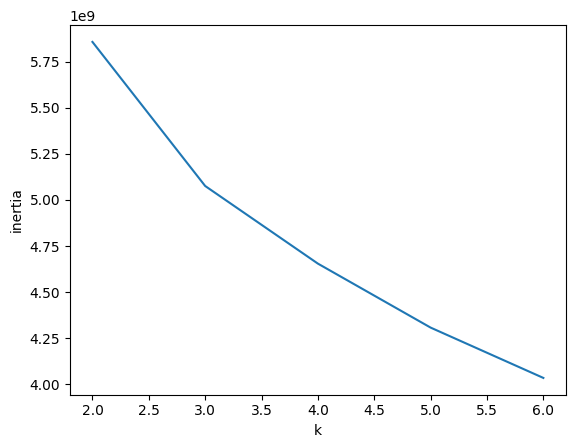

In [37]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    # 이너셔는 내장이다.
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

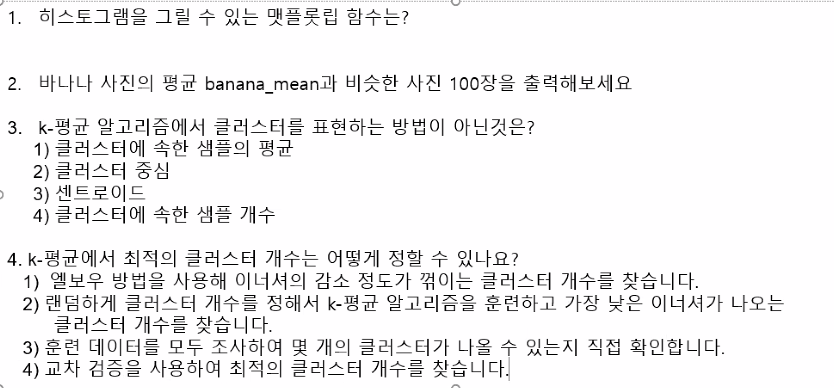

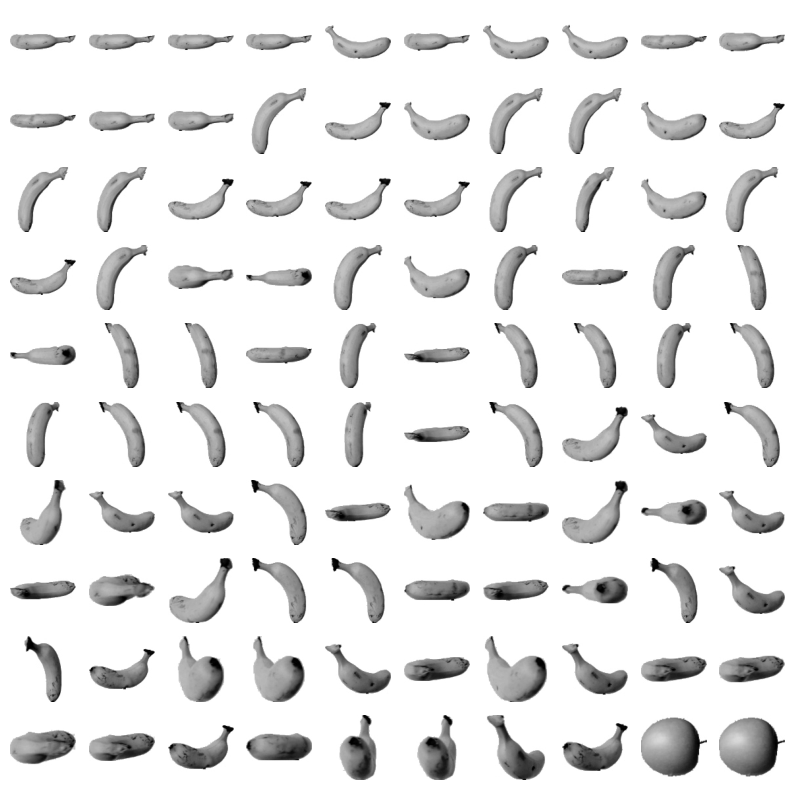

In [53]:
import matplotlib.pyplot as plt
# plt.hist() 
# 바나나들 추천이요
banana = fruits[200:300].reshape(-1, 100*100)
banana_means = banana.mean(axis=1)
abs_diff = np.abs(fruits - banana_means)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()